# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Madison Souder
</br>
Date: February 27, 2025
<br>
<br>

In [1]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [ ]:
# Set working directory (If needed)
import os
os.chdir('')

In [2]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [ ]:
# Print the columns in the database:

In [3]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [27]:
with engine.connect() as connection:
    query = text("""SELECT master_metadata_album_artist_name AS artist,
                    COUNT(*) AS count,
                    ts as year
                    FROM spotify_history
                    WHERE ts LIKE '%2024%'
                    GROUP BY artist
                    ORDER BY count DESC
                    LIMIT 30;""")
    query1 = pd.read_sql(query, connection)

query1 

,artist,count,year
0,Miley Cyrus,680,2024-01-18 23:37:22
1,Ariana Grande,583,2024-01-01 10:21:47
2,Hozier,512,2024-01-27 13:07:12
3,Eminem,454,2024-02-01 12:41:13
4,Sabrina Carpenter,444,2024-01-18 12:57:31
5,Lady Gaga,326,2024-02-02 19:34:51
6,Billie Eilish,284,2024-01-19 15:18:33
7,Noah Cyrus,282,2024-03-14 23:05:56
8,Amy Winehouse,266,2024-04-08 11:09:49
9,Teddy Swims,257,2024-01-19 15:18:36


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [29]:
with engine.connect() as connection:
    query = text("""SELECT master_metadata_track_name AS Song,
                    COUNT(*) AS count,
                    ts as year,
                     master_metadata_album_artist_name AS artist
                    FROM spotify_history
                    WHERE ts LIKE '%2017%'
                    GROUP BY Song
                    ORDER BY count DESC
                    LIMIT 30;""")
    query2 = pd.read_sql(query, connection)

query2

,Song,count,year,artist
0,Malibu,223,2017-05-11 16:37:46,Miley Cyrus
1,Close,150,2017-05-02 00:35:58,Ryan Kinder
2,Shape of You,147,2017-01-24 14:19:52,Ed Sheeran
3,It Ain’t Me (with Selena Gomez),117,2017-02-16 13:10:53,Kygo
4,Take Me Down,95,2017-04-21 14:59:38,The Pretty Reckless
5,Rainbow,95,2017-08-29 14:12:50,Kesha
6,Havana (feat. Young Thug),95,2017-08-21 01:48:40,Camila Cabello
7,Week Without You,88,2017-09-22 15:41:39,Miley Cyrus
8,Anyway,86,2017-04-26 15:00:53,Entrain
9,Love Someone,82,2017-09-29 11:04:11,Miley Cyrus


Query 3: <br>
Ask a question and create your own! 

Find the top 30 songs that recieve the must skips

In [36]:
with engine.connect() as connection:
    query = text("""SELECT skipped as Skips,
                    master_metadata_track_name AS song
                    FROM spotify_history""")
    query3_1 = pd.read_sql(query, connection)

query3_1

#1 = True

,Skips,song
0,0,Some Nights - Intro
1,0,Some Nights
2,1,We Are Young (feat. Janelle Monáe)
3,1,Trip to Your Heart
4,1,Stan
...,...,...
202673,1,"Red - From ""Descendants: The Rise of Red"""
202674,1,Life Is Sweeter
202675,1,Space Between
202676,1,Perfect Revenge


In [47]:
with engine.connect() as connection:
    query = text("""SELECT master_metadata_track_name AS song,
                    COUNT(skipped) AS Skips,
                    master_metadata_album_artist_name AS Artist
                    FROM spotify_history
                    WHERE skipped = '1'
                    GROUP BY song
                    ORDER BY Skips DESC
                    LIMIT 30;""")
    query3 = pd.read_sql(query, connection)

query3

,song,Skips,Artist
0,Easy On Me,104,Adele
1,Flowers,86,Miley Cyrus
2,Too Sweet,84,Hozier
3,Fade Into You,82,Nashville Cast
4,Angels Like You,82,Miley Cyrus
5,Shine,78,Benjamin Francis Leftwich
6,Hallelujah,78,Jeff Buckley
7,All About That Bass,74,Meghan Trainor
8,Will You Still Love Me Tomorrow? - 2011,68,Amy Winehouse
9,Unholy (feat. Kim Petras),67,Sam Smith


In [58]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()

<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x00000203BFAF35C0>>

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [1]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manipulation
import matplotlib.pyplot as plt #For plots

In [3]:
# Connect to our .db file
db_path = "sql-murder-mystery.db"
engine = create_engine(f"sqlite:///{db_path}")
engine

Engine(sqlite:///sql-murder-mystery.db)

In [5]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:

inspector = inspect(engine) #Creates a variable with the assigned function to inspect the db (engine)

# List the tables in our database:
tables = inspector.get_table_names() #The inspector retrieves the table names of the db and assigns them to the variable tables
print(f"The table names are:{tables}") #Prints the table names

for table in tables: #Creates a loop through all the tables
    columns = inspector.get_columns(table) #Assigns the columns from each table to the variable columns
    column_names = [column['name'] for column in columns] #Pulls out only the names of the columns for each table (in its own loop)
    print(f"The column names for {table} are {column_names}.") #Prints out the table name with its column names

The table names are:['crime_scene_report', 'drivers_license', 'facebook_event_checkin', 'get_fit_now_check_in', 'get_fit_now_member', 'income', 'interview', 'person', 'solution']
The column names for crime_scene_report are ['date', 'type', 'description', 'city'].
The column names for drivers_license are ['id', 'age', 'height', 'eye_color', 'hair_color', 'gender', 'plate_number', 'car_make', 'car_model'].
The column names for facebook_event_checkin are ['person_id', 'event_id', 'event_name', 'date'].
The column names for get_fit_now_check_in are ['membership_id', 'check_in_date', 'check_in_time', 'check_out_time'].
The column names for get_fit_now_member are ['id', 'person_id', 'name', 'membership_start_date', 'membership_status'].
The column names for income are ['ssn', 'annual_income'].
The column names for interview are ['person_id', 'transcript'].
The column names for person are ['id', 'name', 'license_id', 'address_number', 'address_street_name', 'ssn'].
The column names for soluti

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [13]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:

with engine.connect() as connection: #Establishes the connection
    query = text("""SELECT city, COUNT(*) as count
                    FROM crime_scene_report
                    GROUP BY city
                    ORDER BY count DESC
                    LIMIT 10;""")      
        #Selects the cities, and creates count from crime_scene_report, groups by city, order the count in descending order, and limits the output to 10
    practice_cities = pd.read_sql(query, connection) #Reads the query with connection to the db

practice_cities #Prints the results

### practice_cities <- dbSendQuery(db, "SELECT city, COUNT(*) as count
                    #        From crime_scene_report
                    #        GROUP BY city
                    #        ORDER BY count DESC
                    #        LIMIT 10")
### dbFetch(practice_cities)

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below. 

,city,count
0,SQL City,9
1,Murfreesboro,9
2,Toledo,8
3,Jersey City,8
4,Evansville,8
5,Duluth,8
6,Wilmington,7
7,Waterbury,7
8,Reno,7
9,Portsmouth,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [33]:
with engine.connect() as connection: #Creates the connection
    query = text("""SELECT type AS crime, 
                    COUNT(*) AS occurrences
                    FROM crime_scene_report
                    WHERE city = 'SQL City'
                    GROUP BY type
                    ORDER BY occurrences DESC""") 
              #Selects the type, counts type from crime_scene_report where the city = SQL City, groups by type, and orders the count in descending order
    crime_type = pd.read_sql(query, connection) #Reads the query with connection to the db 
                                                #Saves the results as a dataframe 

crime_type #Prints the results

,crime,occurrences
0,murder,3
1,assault,2
2,theft,1
3,robbery,1
4,bribery,1
5,arson,1


<b> Answer: </b> Within the time frame of the database, murder has occurred the most out of any crime. This is the crime I would suggest that the officers receive more training on.

Text(0, 0.5, 'Number of Occurrences')

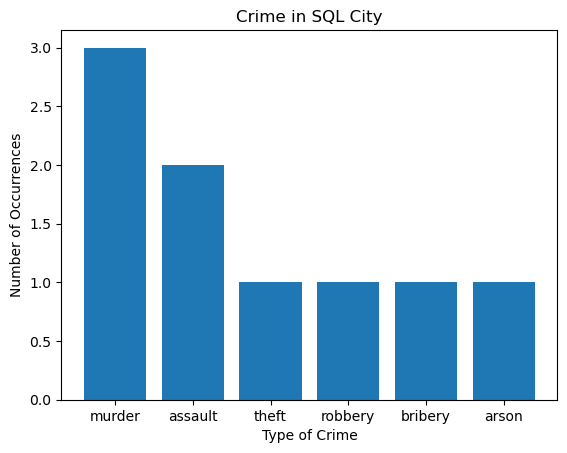

In [42]:
# Graph your results:
plt.bar(crime_type["crime"], crime_type["occurrences"]) #Creates a basic bar plot
plt.title("Crime in SQL City") #Creates a title
plt.xlabel("Type of Crime") #Creates a x-axis label
plt.ylabel("Number of Occurrences") #Creates a y-axis label

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [49]:
with engine.connect() as connection: #Creates the connection
    query = text("""SELECT substring (date, 5, 2) AS month, 
                    COUNT(*) AS occurrences
                    FROM crime_scene_report
                    WHERE city = 'SQL City'
                    GROUP BY month
                    ORDER BY occurrences DESC""") #Selects the substring of the fifth and sixth position of the date (month), 
                                                  #counts the month from crime_scene_report where the city = SQL City, groups by month, 
                                                  #and orders the count in descending order
    month = pd.read_sql(query, connection) #Reads the query with connection to the db 
    
month #Prints the results

,month,occurrences
0,01,4
1,02,2
2,11,1
3,08,1
4,07,1


<b>Answer:</b> The month of Janurary has experienced the highest amount of crime in the time frame given in the database. I would suggest officers work overtime in the month of Januarary.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [11]:
with engine.connect() as connection: #Creates the connection
    query = text("""SELECT membership_status,
                    COUNT(*) as count
                    FROM get_fit_now_member
                    GROUP BY membership_status
                    ORDER BY count""") 
                #Selects the membership status, counts membership status from get_fit_now_member, groups by membership_status, and orders by the count
    gym_membership = pd.read_sql(query, connection) #Reads the query with connection to the db

gym_membership #Prints the results

,membership_status,count
0,regular,53
1,silver,63
2,gold,68


<b>Answer:</b> The regular get fit now gym membership is the least popular membership type. This is the gym membership that the town should give to the officers.

In [14]:
#Disconnect from the database.  Always remember to disconnect :) 
connection.close()